## Introduction

Student ID: IG74096, QW21097

Dataset Source: https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/X_train.csv

The dataset consists of 40000 rows and contains a column named "review". The goal is to cluster the data and apply different models on the data.

## Importing Libraries

In [93]:
import pandas as pd
import numpy as np
import re
import datetime
import warnings
warnings.filterwarnings('ignore')
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [86]:
pd.set_option("max_colwidth", None)

In [87]:
df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/X_train.csv')
df.head(5)     

,review
0,"Shame, is a Swedish film in Swedish with English subtitles. The film is about a husband and wife named Jan, and Eva. They live on an island working as farmers. There is a war going on and soldiers start attacking people on the island. Once the war subsides a little Jan, and Eva are arrested as going along with the opposite side. Once released even more trouble ensues and the film shows how two ordinary people will act in a situation of war and life or death. Winner of The CEC Award for Best Foreign Film at The Cinema Writers Circle Awards, The Guldbagge Award for Best Actress (Liv Ullman, who plays Eva) at The Guldbagge Awards, The NBR Award for Best Foreign Language Film and Best Actress at The National Board Of Review and The NSFC Award for Best Actress, Best Director (Ingmar Bergman) and Best Film at The National Society Of Film Critics Awards. Shame, has good direction, a good script, good performances by both Max Von Sydow (who plays Jan) and Liv Ullman (who plays Eva), good cinematography and good production design. Shame, is a well acted and well made story of how people in a desperate situation will sometimes do whatever they can do in order to survive. The film has a powerful message and is a good film. The reason I'am not rating this film higher is because it is not a masterpiece like some other Ingmar Bergman films like Wild Strawberries, The Seventh Seal or Persona, for example. The film didn't have as big an impact on me as I thought it would and it lacked Ingmar Bergman's thoughtful and philosophical dialog. While nowhere close to being one of his best films there is still a lot to like about Shame, and it is a good movie. I just probably would have liked it more having not seen some of those other Bergman masterpieces."
1,"I know it's rather unfair to comment on a movie without seeing the complete piece - but I am going to anyway! I waited for a laugh, I tried to give it time. I think 20 minutes is long enough to wait in a comedy for a laugh. My laugh never came, so I gave up.<br /><br />It's stupid humour, not so stupid that you have to laugh, though. It isn't anywhere near that high grade. Let me correct that, it's just *stupid* - not stupid humour. They may have intended for certain scenes to be funny, but they weren't. I suppose, if you were really bored you could somehow blend the movie with a hallucination and end up with a mildly entertaining experience.<br /><br />A very pathetic effort."
2,"""Bread"" very sharply skewers the conventions of horror movies in general and ""Night of the Living Dead"" in specific and is constantly inventive. The production values are a little rough at times (it's a student film, after all), but it never loses sight of its goal to entertain. Hey -- George Romero liked it enough to include it on the remastered ""Dead"" video tape, laserdisc and DVD... that should tell you something."
3,"After reading tons of good reviews about this movie I decided to take it for a spin (I bought it on DVD, hence the ""spin"" pun...I'm a dork). The beginning was everything I hoped for, a perfect set-up (along with some quotes that I've heard on Various Wu-Tang albums) to what should have been a good movie. But the plot I heard was so great, was so predictable. Every time I saw a character (except for the Lizard) I guessed which Venom he was. Plus, the only cool character gets killed off in the middle of the movie. Ok, so the plot wasn't very good but at least there was some good kung-fu right? Wrong. The fights were very short and few and far between. Granted the different styles were all pretty cool but I wish the fights were longer. I kept hoping to see the Lizard run and do some crazy ish on the walls but it never happened. I was hoping to see the Centipede do some tight speedy ish but it never happened. I was hoping to see the Scorpion in the movie for more than 7 total minutes but it never happened. In short, not much happens. The fighting is all pretty routine. Don't be fooled 

## Data Pre-Processing

In [88]:
df['review'] = df['review'].str.replace('<.*?>', '', regex=True)
df['review'] = df['review'].str.replace('https:\/\/.*', '', regex=True)
df['review'].head(2)

0    Shame, is a Swedish film in Swedish with English subtitles. The film is about a husband and wife named Jan, and Eva. They live on an island working as farmers. There is a war going on and soldiers start attacking people on the island. Once the war subsides a little Jan, and Eva are arrested as going along with the opposite side. Once released even more trouble ensues and the film shows how two ordinary people will act in a situation of war and life or death. Winner of The CEC Award for Best Foreign Film at The Cinema Writers Circle Awards, The Guldbagge Award for Best Actress (Liv Ullman, who plays Eva) at The Guldbagge Awards, The NBR Award for Best Foreign Language Film and Best Actress at The National Board Of Review and The NSFC Award for Best Actress, Best Director (Ingmar Bergman) and Best Film at The National Society Of Film Critics Awards. Shame, has good direction, a good script, good performances by both Max Von Sydow (who plays Jan) and Liv Ullman (who plays Eva), good 

In [89]:
df['review'] = df['review'].str.replace('\,\s?|\.\s?|\s?\(|\)\s?|-|--|!\s?|\*|\s\'|\'\s|\s?\"|\"\s?|\.|\?|\;\s?|\:\s?', ' ', regex=True)
df['review'].str.replace('\s\s+',' ', regex=True)

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Shame is a Swedish film in 

All the special characters and tags from the data are removed

In [90]:
df1 = pd.DataFrame(df['review'])
df1

,review
0,Shame is a Swedish film in Swedish with English subtitles The film is about a husband and wife named Jan and Eva They live on an island working as farmers There is a war going on and soldiers start attacking people on the island Once the war subsides a little Jan and Eva are arrested as going along with the opposite side Once released even more trouble ensues and the film shows how two ordinary people will act in a situation of war and life or death Winner of The CEC Award for Best Foreign Film at The Cinema Writers Circle Awards The Guldbagge Award for Best Actress Liv Ullman who plays Eva at The Guldbagge Awards The NBR Award for Best Foreign Language Film and Best Actress at The National Board Of Review and The NSFC Award for Best Actress Best Director Ingmar Bergman and Best Film at The National Society Of Film Critics Awards Shame has good direction a good script good performances by both Max Von Sydow who plays Jan and Liv Ullman who plays Eva good cinematography and good production design Shame is a well acted and well made story of how people in a desperate situation will sometimes do whatever they can do in order to survive The film has a powerful message and is a good film The reason I'am not rating this film higher is because it is not a masterpiece like some other Ingmar Bergman films like Wild Strawberries The Seventh Seal or Persona for example The film didn't have as big an impact on me as I thought it would and it lacked Ingmar Bergman's thoughtful and philosophical dialog While nowhere close to being one of his best films there is still a lot to like about Shame and it is a good movie I just probably would have liked it more having not seen some of those other Bergman masterpieces
1,I know it's rather unfair to comment on a movie without seeing the complete piece but I am going to anyway I waited for a laugh I tried to give it time I think 20 minutes is long enough to wait in a comedy for a laugh My laugh never came so I gave up It's stupid humour not so stupid that you have to laugh though It isn't anywhere near that high grade Let me correct that it's just stupid not stupid humour They may have intended for certain scenes to be funny but they weren't I suppose if you were really bored you could somehow blend the movie with a hallucination and end up with a mildly entertaining experience A very pathetic effort
2,Bread very sharply skewers the conventions of horror movies in general and Night of the Living Dead in specific and is constantly inventive The production values are a little rough at times it's a student film after all but it never loses sight of its goal to entertain Hey George Romero liked it enough to include it on the remastered Dead video tape laserdisc and DVD that should tell you something
3,After reading tons of good reviews about this movie I decided to take it for a spin I bought it on DVD hence the spin pun I'm a dork The beginning was everything I hoped for a perfect set up along with some quotes that I've heard on Various Wu Tang albums to what should have been a good movie But the plot I heard was so great was so predictable Every time I saw a character except for the Lizard I guessed which Venom he was Plus the only cool character gets killed off in the middle of the movie Ok so the plot wasn't very good but at least there was some good kung fu right Wrong The fights were very short and few and far between Granted the different styles were all pretty cool but I wish the fights were longer I kept hoping to see the Lizard run and do some crazy ish on the walls but it never happened I was hoping to see the Centipede do some tight speedy ish but it never happened I was hoping to see the Scorpion in the movie for more than 7 total minutes but it never happened In short not much happens The fighting is all pretty routine Don't be fooled just becuase this movie has a plot it does not mean it's a good one
4,During the Civil war a wounded union soldier hides out in a isolated Confeder

## Tokenization

In [8]:
#Tokenize: Split all columns to words
words = dict()

st = datetime.datetime.now()

for index, row in df.iterrows():
    review_words = row['review'].split()
    for word in review_words:
        word = word.lower()
        if word in words:
            words[word] += 1
        else:
            words[word] = 1

en = datetime.datetime.now()
el = en - st

print(f'Completed in {el}')

Completed in 0:00:07.145156


In [9]:
print(words)

{'shame': 1100, 'is': 168434, 'a': 257346, 'swedish': 183, 'film': 62075, 'in': 148795, 'with': 69601, 'english': 1590, 'subtitles': 334, 'the': 532050, 'about': 27202, 'husband': 1491, 'and': 258698, 'wife': 3151, 'named': 1266, 'jan': 100, 'eva': 181, 'they': 33545, 'live': 2400, 'on': 54154, 'an': 34181, 'island': 1017, 'working': 1263, 'as': 73130, 'farmers': 49, 'there': 24871, 'war': 3571, 'going': 6565, 'soldiers': 746, 'start': 2729, 'attacking': 102, 'people': 14208, 'once': 3656, 'subsides': 6, 'little': 9911, 'are': 46680, 'arrested': 200, 'along': 3003, 'opposite': 444, 'side': 1997, 'released': 1595, 'even': 19874, 'more': 22263, 'trouble': 832, 'ensues': 147, 'shows': 3810, 'how': 14183, 'two': 10777, 'ordinary': 453, 'will': 14424, 'act': 1976, 'situation': 1117, 'of': 230251, 'life': 10192, 'or': 28148, 'death': 3152, 'winner': 346, 'cec': 2, 'award': 650, 'for': 69816, 'best': 9965, 'foreign': 422, 'at': 37255, 'cinema': 2241, 'writers': 972, 'circle': 162, 'awards': 3

In [10]:
print(f'Length of new dictionary: {len(words.keys()):,}')

Length of new dictionary: 113,380


Split the data into tokens to analize word frequencies, bigrams, trigrams and the patterns in the data

## Lemmatization

In [11]:
#applied lemmatization
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
# initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# apply tokenization and lemmatization to each review in the DataFrame
df['review'] = df['review'].apply(lambda x: [lemmatizer.lemmatize(w.lower()) for w in word_tokenize(x)])
df['review']

0                                         [shame, is, a, swedish, film, in, swedish, with, english, subtitle, the, film, is, about, a, husband, and, wife, named, jan, and, eva, they, live, on, an, island, working, a, farmer, there, is, a, war, going, on, and, soldier, start, attacking, people, on, the, island, once, the, war, subsides, a, little, jan, and, eva, are, arrested, a, going, along, with, the, opposite, side, once, released, even, more, trouble, ensues, and, the, film, show, how, two, ordinary, people, will, act, in, a, situation, of, war, and, life, or, death, winner, of, the, cec, award, for, best, foreign, film, at, the, cinema, writer, ...]
1                                                                                   [i, know, it, 's, rather, unfair, to, comment, on, a, movie, without, seeing, the, complete, piece, but, i, am, going, to, anyway, i, waited, for, a, laugh, i, tried, to, give, it, time, i, think, 20, minute, is, long, enough, to, wait, in, a, comedy, f

In [13]:
#Removed stop words
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
stop = stopwords.words('english')
for sw in list(stop):
    words.pop(sw, None)
    
print(f'Length of new dictionary: {len(words.keys()):,}')

Length of new dictionary: 113,209


In [15]:
df.head(2)

,review
0,"[shame, is, a, swedish, film, in, swedish, with, english, subtitle, the, film, is, about, a, husband, and, wife, named, jan, and, eva, they, live, on, an, island, working, a, farmer, there, is, a, war, going, on, and, soldier, start, attacking, people, on, the, island, once, the, war, subsides, a, little, jan, and, eva, are, arrested, a, going, along, with, the, opposite, side, once, released, even, more, trouble, ensues, and, the, film, show, how, two, ordinary, people, will, act, in, a, situation, of, war, and, life, or, death, winner, of, the, cec, award, for, best, foreign, film, at, the, cinema, writer, ...]"
1,"[i, know, it, 's, rather, unfair, to, comment, on, a, movie, without, seeing, the, complete, piece, but, i, am, going, to, anyway, i, waited, for, a, laugh, i, tried, to, give, it, time, i, think, 20, minute, is, long, enough, to, wait, in, a, comedy, for, a, laugh, my, laugh, never, came, so, i, gave, up, it, 's, stupid, humour, not, so, stupid, that, you, have, to, laugh, though, it, is, n't, anywhere, near, that, high, grade, let, me, correct, that, it, 's, just, stupid, not, stupid, humour, they, may, have, intended, for, certain, scene, to, be, funny, but, they, ...]"


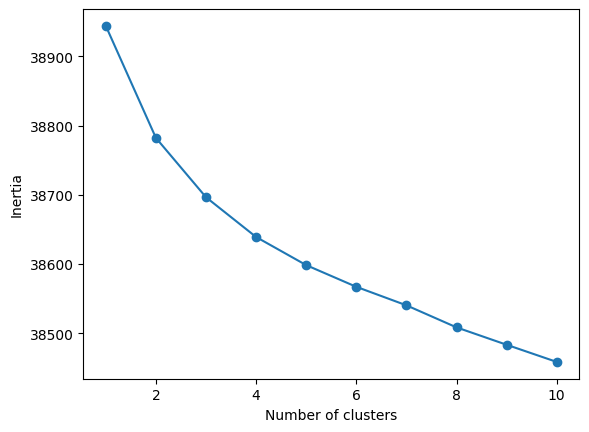

In [16]:
text_list = [str(review) for review in df['review']]

# Convert the text column to a TF-IDF matrix
vectorizer = TfidfVectorizer(stop_words='english')
train_data_features = vectorizer.fit_transform(text_list)

# Perform K-means clustering with a range of cluster sizes
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(train_data_features)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [17]:
# Perform K-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2,n_init=10, random_state=42)
kmeans.fit(train_data_features)

# Add the cluster labels to the dataset
df['cluster'] = kmeans.labels_

# Print the top 10 words in each cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(2):
    print('Cluster {}:'.format(i))
    for j in order_centroids[i, :10]:
        print('    {}'.format(terms[j]))
    print()

Cluster 0:
    film
    wa
    movie
    ha
    like
    character
    time
    just
    story
    good

Cluster 1:
    movie
    wa
    just
    like
    bad
    good
    really
    did
    film
    time



According to above plot, we consider 2 as the best possible clusters

In [42]:
from sklearn.decomposition import TruncatedSVD

n_comp=30
svd = TruncatedSVD(n_components=n_comp, random_state=42)
svd_tfidf = svd.fit_transform(train_data_features)

## Train-Test-Split

In [44]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(text_list, df['cluster'], test_size=0.2, random_state=42)

# Convert the text data to a TF-IDF matrix
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Apply SVD for dimensionality reduction
svd = TruncatedSVD(n_components=30)
X_train_svd = svd.fit_transform(X_train_tfidf)
X_test_svd = svd.transform(X_test_tfidf)

## ML Models

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# Create a logistic regression model
lr_model = LogisticRegression(solver='liblinear', max_iter=1000)

# Train the model on the training set
lr_model.fit(X_train_svd, y_train)

y_pred = lr_model.predict(X_test_svd)
accuracy = lr_model.score(X_test_svd, y_test)
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy:', accuracy)
print('F1 Score:', f1)
print(classification_report(y_test, y_pred))

Accuracy: 0.983625
F1 Score: 0.9835109114632818
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5723
           1       0.99      0.95      0.97      2277

    accuracy                           0.98      8000
   macro avg       0.99      0.97      0.98      8000
weighted avg       0.98      0.98      0.98      8000



In [50]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
rf_model = rf.fit(X_train_svd, y_train)

# Test the model on the testing set
y_pred = rf.predict(X_test_svd)
accuracy = rf.score(X_test_svd, y_test)
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy:', accuracy)
print('F1 Score:', f1)

Accuracy: 0.98
F1 Score: 0.9799760187862072


In [48]:
from sklearn.svm import SVC

# Create an SVM model
svm = SVC(kernel='linear', C=1, gamma='auto')

# Train the model on the training set
svm.fit(X_train_svd, y_train)

# Test the model on the testing set
y_pred = svm.predict(X_test_svd)
accuracy = svm.score(X_test_svd, y_test)
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy:', accuracy)
print('F1 Score:', f1)
print(classification_report(y_test, y_pred))

Accuracy: 0.989375
F1 Score: 0.9893471511302478
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5723
           1       0.99      0.97      0.98      2277

    accuracy                           0.99      8000
   macro avg       0.99      0.98      0.99      8000
weighted avg       0.99      0.99      0.99      8000



## Production Dataset

In [20]:
df_final = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/X_final.csv')
df_final.head(5)

,review
0,"I first saw Heimat 2 on BBC2 in the 90's when I was at art college living and moving among artists and musicians, hoping for future success. So 'The Second Home' - of friendships made after leaving the familial home, of striving for a professional excellence - strongly resonated with my living reality. I was captivated by the characters, the storytelling, the lyrical camera-work and above all by the music. In it I could divine the beginnings of German Electronic music, of 50's Stockhausen, Kraftwerk, Can, Neue, Faust of the 70's, the sound experiments of John Cage, Walter Carlos and the British electronic psychedelia of The White Noise. The soundtrack composer Nikos Mamangakis studied with Carl Orff of Carmina Burana-fame so I found its tastes contemporary to the Electronic Pop/ Sound Effects world.<br /><br />I hadnt seen Heimat or Heimat 3 so I watched it as a whole in itself without a before or after. As someone else has commented, it is both epic and lyrical - historical and artistic. Many favourite moments including the wonderful voice of Gisela Muller (Evelyn), the Bach marimba of Daniel Smith (Juan), the piano-playing of Henry Arnold (Hermann) and the cello-playing of Salome Kammer (Clarissa).<br /><br />I could write more but it's already been said here. Why can't British or US TV PRODUCE SUCH MASTERPIECES ? The Wire had the realism and politics and epic sweep of a city, David Lynch and Dennis Potter had imaginative tropes to their serialised TV work too but this is art-house and soap at its most cinematic and narrative sublime. It's never included in critics' choices of Best Films but it should be. Still as poetic and powerful as when I first saw it over 17 years ago. I watch the 3 boxed sets every autumn for their 'mellow fruitfulness'. Inspired and inspiring."
1,"I sat down to watch ""Midnight Cowboy"" thinking it would be another overrated '60s/'70s movie. Some of my favorite films come from the '70s, in the same vein as ""Midnight Cowboy"" (""Taxi Driver,"" ""Mean Streets,"" ""Panic in Needle Park,"" etc.) but there are many, many overrated ones as well that have gained strong reputations amongst critics for being groundbreaking - unfortunately a vast majority of them don't hold up as well today. I sort of feel this way about ""Easy Rider."" (Although it, too, is one of my favorites.)<br /><br />So, I didn't expect much from ""Midnight Cowboy"" but got a lot back. It's a touching story, well-made and well-told with some of the best performances of all time. Dustin Hoffman, as Enrico ""Ratso"" Rizzo, gives one of his best - it's a bit funny at times (he sounds like a cartoon character when he speaks - maybe because of the Lenny/""Simpsons"" connection), but Hoffman is entirely convincing. Half of the film's budget went towards his paycheck as he was just becoming a major star in Hollywood. Opposite him is the second-billed Jon Voight as Joe Buck, the ""cowboy"" who travels North to the Big Apple in the hopes of becoming a male prostitute. Soon his naive ways land him in trouble and he pairs up with a crippled scam artist named ""Ratso"" - who offers to become Joe's ""manager"" for a certain percentage of profits.<br /><br />The movie is quite long at two hours but never really seems very long. Some films can tend to drag, especially some of the films that were made in the '70s because (as it's been said in ""Easy Riders, Raging Bulls"") the directors were the stars of the movies in the 1970s and occasionally they got a bit too infatuated with their material, going on too long examining characters/scenes/etc. that aren't important. Just about the only scene I felt was a bit too long and unnecessary was the drug party - it makes the film seem extremely outdated (similar to the drug odysseys in ""Easy Rider"") and really harms its flow because it's not needed.<br /><br />Other than that, ""Midnight Cowboy"" is an almost flawless motion picture. I was pleasantly surprised. It does have its flaws (flashbacks 

In [21]:
df_final['review'] = df_final['review'].str.replace('<.*?>', '', regex=True)
df_final['review'] = df_final['review'].str.replace('https:\/\/.*', '', regex=True)
df_final['review'] = df_final['review'].str.replace('\,\s?|\.\s?|\s?\(|\)\s?|-|--|!\s?|\*|\s\'|\'\s|\s?\"|\"\s?|\.|\?|\;\s?|\:\s?', ' ', regex=True)
df_final['review'] = df_final['review'].str.replace('\s\s+',' ', regex=True)

In [22]:
#Tokenize: Split all columns to words
words = dict()

st = datetime.datetime.now()

for index, row in df_final.iterrows():
    review_words = row['review'].split()
    for word in review_words:
        word = word.lower()
        if word in words:
            words[word] += 1
        else:
            words[word] = 1

en = datetime.datetime.now()
el = en - st

print(f'Completed in {el}')

Completed in 0:00:03.725743


In [23]:
print(f'Length of new dictionary: {len(words.keys()):,}')

Length of new dictionary: 60,537


In [24]:
# initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# apply tokenization and lemmatization to each review in the DataFrame
df_final['review'] = df_final['review'].apply(lambda x: [lemmatizer.lemmatize(w.lower()) for w in word_tokenize(x)])
df_final['review']

0       [i, first, saw, heimat, 2, on, bbc2, in, the, 90, 's, when, i, wa, at, art, college, living, and, moving, among, artist, and, musician, hoping, for, future, success, so, the, second, home, of, friendship, made, after, leaving, the, familial, home, of, striving, for, a, professional, excellence, strongly, resonated, with, my, living, reality, i, wa, captivated, by, the, character, the, storytelling, the, lyrical, camera, work, and, above, all, by, the, music, in, it, i, could, divine, the, beginning, of, german, electronic, music, of, 50, 's, stockhausen, kraftwerk, can, neue, faust, of, the, 70, 's, the, sound, experiment, of, john, cage, walter, ...]
1                          [i, sat, down, to, watch, midnight, cowboy, thinking, it, would, be, another, overrated, 60s/'70s, movie, some, of, my, favorite, film, come, from, the, 70, in, the, same, vein, a, midnight, cowboy, taxi, driver, mean, street, panic, in, needle, park, etc, but, there, are, many, many, overrated, one, a, 

In [25]:
stop = stopwords.words('english')
for sw in list(stop):
    words.pop(sw, None)
    
print(f'Length of new dictionary: {len(words.keys()):,}')

Length of new dictionary: 60,374


In [26]:
df_final.head(2)

,review
0,"[i, first, saw, heimat, 2, on, bbc2, in, the, 90, 's, when, i, wa, at, art, college, living, and, moving, among, artist, and, musician, hoping, for, future, success, so, the, second, home, of, friendship, made, after, leaving, the, familial, home, of, striving, for, a, professional, excellence, strongly, resonated, with, my, living, reality, i, wa, captivated, by, the, character, the, storytelling, the, lyrical, camera, work, and, above, all, by, the, music, in, it, i, could, divine, the, beginning, of, german, electronic, music, of, 50, 's, stockhausen, kraftwerk, can, neue, faust, of, the, 70, 's, the, sound, experiment, of, john, cage, walter, ...]"
1,"[i, sat, down, to, watch, midnight, cowboy, thinking, it, would, be, another, overrated, 60s/'70s, movie, some, of, my, favorite, film, come, from, the, 70, in, the, same, vein, a, midnight, cowboy, taxi, driver, mean, street, panic, in, needle, park, etc, but, there, are, many, many, overrated, one, a, well, that, have, gained, strong, reputation, amongst, critic, for, being, groundbreaking, unfortunately, a, vast, majority, of, them, do, n't, hold, up, a, well, today, i, sort, of, feel, this, way, about, easy, rider, although, it, too, is, one, of, my, favorite, so, i, did, n't, expect, much, from, midnight, cowboy, but, got, ...]"


In [36]:
X_final_processed_text = [' '.join(review) for review in df_final['review']]
X_final_data_features = vectorizer.fit_transform(X_final_processed_text)

In [55]:
# Use the random forest to make sentiment label predictions

svd = TruncatedSVD(n_components=30, random_state=42)
svd_tfidf = svd.fit_transform(X_final_data_features)

result = rf_model.predict(svd_tfidf)

result_trimmed = result[:10000]

# Create the output DataFrame
output = pd.DataFrame(data={"review": df_final["review"], "sentiment": result_trimmed})
output


,review,sentiment
0,"[i, first, saw, heimat, 2, on, bbc2, in, the, 90, 's, when, i, wa, at, art, college, living, and, moving, among, artist, and, musician, hoping, for, future, success, so, the, second, home, of, friendship, made, after, leaving, the, familial, home, of, striving, for, a, professional, excellence, strongly, resonated, with, my, living, reality, i, wa, captivated, by, the, character, the, storytelling, the, lyrical, camera, work, and, above, all, by, the, music, in, it, i, could, divine, the, beginning, of, german, electronic, music, of, 50, 's, stockhausen, kraftwerk, can, neue, faust, of, the, 70, 's, the, sound, experiment, of, john, cage, walter, ...]",0
1,"[i, sat, down, to, watch, midnight, cowboy, thinking, it, would, be, another, overrated, 60s/'70s, movie, some, of, my, favorite, film, come, from, the, 70, in, the, same, vein, a, midnight, cowboy, taxi, driver, mean, street, panic, in, needle, park, etc, but, there, are, many, many, overrated, one, a, well, that, have, gained, strong, reputation, amongst, critic, for, being, groundbreaking, unfortunately, a, vast, majority, of, them, do, n't, hold, up, a, well, today, i, sort, of, feel, this, way, about, easy, rider, although, it, too, is, one, of, my, favorite, so, i, did, n't, expect, much, from, midnight, cowboy, but, got, ...]",1
2,"[i, can, never, fathom, why, people, take, time, to, review, movie, that, they, have, not, understood, fully, i, know, people, will, read, scathing, review, on, these, page, of, this, film, and, it, will, keep, them, from, seeking, copy, of, this, quite, forgotten, late, 20, style, but, 1932, movie, which, should, probably, be, referred, to, a, indecent, a, that, is, the, name, on, the, main, title, myrna, loy, best, known, a, a, comic, actress, in, countless, genteel, role, show, herself, to, be, miscast, in, all, of, them, she, wa, a, true, dramatic, actress, something, that, i, did, not, know, before, watching, ...]",0
3,"[with, that, line, start, one, silly, boring, british, sci, fi, film, the, great, vorelli, from, the, movie, devil, doll, build, a, teleportation, machine, only, to, have, his, funding, cut, off, by, blanchard, a, bearded, man, who, ha, a, thing, for, bow, tie, and, men, with, large, eye, brow, when, his, experiment, fails, the, good, doctor, learns, that, lembach, the, man, who, control, all, of, the, grant, in, the, world, will, be, staying, in, london, for, a, few, day, he, attempt, to, project, himself, into, the, house, of, blanchard, with, the, help, of, his, comely, lab, assistant, sheila, needle, to, say, ...]",1
4,"[here, 's, the, spoiler, at, the, end, of, the, movie, a, little, piece, of, you, dy, you, 'll, spend, the, rest, of, your, life, searching, in, vain, for, that, missing, piece, but, it, 's, gone, it, 's, gone, you, 'll, wander, the, street, at, night, peering, into, your, neighbor, window, a, they, sit, down, for, dinner, friend, and, family, will, try, to, pinpoint, when, exactly, you, turned, into, the, walking, dead, you, 'll, answer, their, question, and, concern, with, a, blank, stare, and, some, mumbling, about, a, runaway, testicle, when, amc, inevitably, make, tomcat, the, movie, of, the, month, a, ...]",0
...,...,...
9995,"[protocol, is, a, hit, and, miss, picture, starring, goldie, hawn, a, a, bubbly, cocktail, waitress, who, one, night, save, the, life, of, a, visiting, arab, from, an, assassination, attempt, the, woman, immediately, becomes, a, celebrity, and, get, a, new, job, working, for, the, u, s, government, will, the, corridor, of, power, in, our, nation, 's, capital, ever, be, the, same, hawn, is, excellent, a, usual, even, though, protocol, is, n't, a, funny, a, her, best, film, private, benjamin, but, it, 's, still, a, good, movie, and, i, did, laugh, alot, out, of, four]",0
9996,"[in, the, same, vein, a, natural, born, killer, another, movie, that, wa, not, so, popular, with, critic, because, of, it, excessive, violence, but, that, i, also, loved, kalifor

Per above each review is assigned either a 0 0r 1 and the clusters are divided

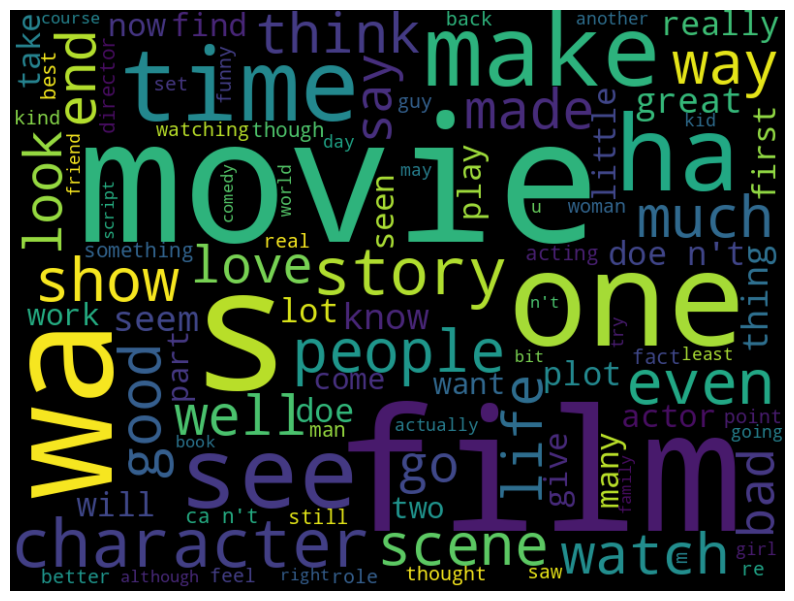

In [56]:
processed_text = [(' '.join(sentence)) for sentence in df['review']]
whole_reviews = ' '.join(processed_text)


# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=180, max_words=100, width=800, height=600).generate(whole_reviews)

# Display the generated image:
plt.figure( figsize=(10,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Kmeans grid search

In [57]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import MiniBatchKMeans

range_n_clusters = [2,3,4]

cluster_grid_df = pd.DataFrame(columns=["cluster_size", "silhouette_score"])

for num_clusters in range_n_clusters:
    
    kmeans_model = MiniBatchKMeans(n_clusters=num_clusters,
                               init='k-means++',
                               n_init=1,
                               init_size=1000, batch_size=1000, verbose=0, max_iter=1000, random_state=42)

    kmeans = kmeans_model.fit(train_data_features)
    kmeans_clusters = kmeans.predict(train_data_features)
    silhouette_avg = silhouette_score(train_data_features, kmeans_clusters)
    print("For n_clusters =", num_clusters, "The average silhouette_score is :", silhouette_avg)
    cluster_grid_df = cluster_grid_df.append({'cluster_size': num_clusters, 'silhouette_score': silhouette_avg}, ignore_index=True)

For n_clusters = 2 The average silhouette_score is : 0.0021319315102543207
For n_clusters = 3 The average silhouette_score is : -0.00024476339754008657
For n_clusters = 4 The average silhouette_score is : -0.0006087569223445994


From above we could find the optimal number of clusters and evaluate clustering via silhouette score. For clusters 2 a score of 0.002 is attained which evaluates the best possible number of clusters

In [58]:
num_clusters = int(cluster_grid_df[np.abs(cluster_grid_df.silhouette_score) == np.max(cluster_grid_df.silhouette_score)].cluster_size)


kmeans_model = MiniBatchKMeans(n_clusters=num_clusters,
                               init='k-means++',
                               n_init=1,
                               init_size=1000, batch_size=1000, verbose=0, max_iter=1000, random_state=42)

kmeans = kmeans_model.fit(train_data_features)
kmeans_clusters = kmeans.predict(train_data_features)
kmeans_distances = kmeans.transform(train_data_features)

In [68]:
num_clusters = int(cluster_grid_df[np.abs(cluster_grid_df.silhouette_score) == np.max(cluster_grid_df.silhouette_score)].cluster_size)

print("Representative terms per cluster center:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(num_clusters):
    print("Cluster %d:" % i)
    center_cluster_str_words = []
    for ind in order_centroids[i, :1]:
        str = "".join(terms[ind])
        center_cluster_str_words.append(str)
    print(' %s' % "|".join(center_cluster_str_words))
    print()

Representative terms per cluster center:
Cluster 0:
 particullary

Cluster 1:
 gays



In [69]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, init='pca', random_state=42, n_iter=500)

tsne_kmeans = tsne_model.fit_transform(kmeans_distances)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 40000 samples in 0.026s...
[t-SNE] Computed neighbors for 40000 samples in 0.848s...
[t-SNE] Computed conditional probabilities for sample 1000 / 40000
[t-SNE] Computed conditional probabilities for sample 2000 / 40000
[t-SNE] Computed conditional probabilities for sample 3000 / 40000
[t-SNE] Computed conditional probabilities for sample 4000 / 40000
[t-SNE] Computed conditional probabilities for sample 5000 / 40000
[t-SNE] Computed conditional probabilities for sample 6000 / 40000
[t-SNE] Computed conditional probabilities for sample 7000 / 40000
[t-SNE] Computed conditional probabilities for sample 8000 / 40000
[t-SNE] Computed conditional probabilities for sample 9000 / 40000
[t-SNE] Computed conditional probabilities for sample 10000 / 40000
[t-SNE] Computed conditional probabilities for sample 11000 / 40000
[t-SNE] Computed conditional probabilities for sample 12000 / 40000
[t-SNE] Computed conditional probabilities for sam

## Sanity Checks

In [71]:
import chardet

# Check for missing or empty values
print("Missing values:\n", df['review'].isnull().sum())
print("Empty values:\n", (df['review'].str.strip() == '').sum())

Missing values:
 0
Empty values:
 0


In [72]:
# Check the length of the text
print("Text length statistics:\n", df['review'].str.len().describe())

Text length statistics:
 count    40000.000000
mean       234.853600
std        174.052256
min          6.000000
25%        129.000000
50%        176.000000
75%        285.000000
max       2497.000000
Name: review, dtype: float64


In [73]:
# Check for special characters
print("Special characters:\n", df['review'].str.contains('[^a-zA-Z0-9\s]').sum())


Special characters:
 0.0


In [74]:
# Check for duplicates
print("Duplicate rows:\n", df[df.duplicated('review')])

Duplicate rows:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              review  \
723                                                                    [leo, carax, ha, made, 3, great, movie, boy, meet, girl, mauvais, sang, le, amants, du, pont, neuf, in, fact, those, film, were, not, that, great, but, it, ha, the, violence, of, youth, the, beauty, of, juvenile, wilderness, carax, i

In [76]:
def get_word_count_dict(tokens):
    
    words_count_dict = dict()

    for sentence in tokens:
        for word in sentence:
            if word not in words_count_dict:
                words_count_dict[word] = 1
            else:
                words_count_dict[word] += 1
    
    return words_count_dict

words_count_dict = get_word_count_dict(df['review'])

top_words = pd.DataFrame.from_dict(words_count_dict, orient='index', columns=['frequency'])
top_words.index.name = 'word'
top_words = top_words.sort_values(by='frequency', ascending=False)

print(top_words.head(20))

       frequency
word            
the       532174
a         330704
and       258710
of        230257
to        213731
is        173484
it        165129
in        148873
i         139950
this      120248
that      114823
's         97246
movie      82515
wa         79882
film       74525
for        69819
with       69604
but        66739
you        55049
on         54167


In [91]:
bigram_dict = dict()
limit = 20

bigrm = list(nltk.bigrams(' '.join(df1.review.values).split()))

for elem in bigrm:
    new_elem = ' '.join(elem)
    if new_elem not in bigram_dict:
        bigram_dict[new_elem] = 1
    else:
        bigram_dict[new_elem] += 1

bigram_df = pd.DataFrame.from_dict(bigram_dict, orient='index', columns=["frequency"])
bigram_df["bigram"] = bigram_df.index 
bigram_df = bigram_df.reset_index(drop=True)
bigram_df.sort_values(ascending=False, by="frequency").head(limit)

,frequency,bigram
415,59893,of the
554,37018,in the
1,20623,is a
475,20204,this movie
65,19408,and the
1097,18454,to the
369,18419,to be
66,16704,the film
386,15746,the movie
196,14408,this film


In [92]:
trigram_dict = dict()
limit = 20

trigrm = list(nltk.trigrams(' '.join(df1.review.values).split()))

for elem in trigrm:
    new_elem = ' '.join(elem)
    if new_elem not in trigram_dict:
        trigram_dict[new_elem] = 1
    else:
        trigram_dict[new_elem] += 1


trigram_df = pd.DataFrame.from_dict(trigram_dict, orient='index', columns=["frequency"])
trigram_df["trigram"] = trigram_df.index 
trigram_df = trigram_df.reset_index(drop=True)
trigram_df.sort_values(ascending=False, by="frequency").head(limit)

,frequency,trigram
2148,6983,one of the
3868,3836,of the film
1872,3460,a lot of
599,3367,of the movie
6449,2798,is one of
5180,2479,some of the
2953,2460,to be a
4315,2420,in this movie
1595,2406,this movie is
3235,2354,in the film


## Summary

Text cleaning was necessary to analyze how people express sentiments. Additionally, insights were gained from analyzing word frequencies, bigrams, trigrams, named entities, wordclouds, and identifying the most relevant words for each sentiment.

In the Unsupervised Learning phase, two major dimensionality reduction techniques, namely SVD and PCA, were applied. SVD reduced the dimensions of the TF-IDF matrix to 30 dimensions, while PCA was used as a parameter in the t-SNE algorithm. This facilitated the creation of visualizations in 2D and 3D, depicting phrases/reviews and words within the Kmeans clustering.
